In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore") # Ignore warning

pd.set_option('float_format', '{:.2f}'.format) # Show full number instead of show number like "1.5e2"

In [21]:
# Input datas
df_orders = pd.read_csv('pizza_sales\orders.csv')
df_detail = pd.read_csv('pizza_sales\order_details.csv')
df_type = pd.read_csv('pizza_sales\pizza_types.csv',index_col=None, header=0, encoding='unicode_escape')
df_pizzas = pd.read_csv('pizza_sales\pizzas.csv')

# Data understanding

In [23]:
df_orders.head(1)

,order_id,date,time
0,1,2015-01-01,11:38:36


In [25]:
df_detail.head(1)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1


In [26]:
df_type.head(1)

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."


In [27]:
df_pizzas.head(1)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75


In [ ]:
# Check and convert date and time to datetime format
df_orders.date = pd.to_datetime(df_orders.date)
df_orders.time = pd.to_datetime(df_orders['time'], format='%H:%M:%S').dt.time
df_orders.info()

In [115]:
# Check period of date
print('min date:',df_orders['date'].min())
print('max date:',df_orders['date'].max())
# => This was selling data in 2015

min date: 2015-01-01 00:00:00
max date: 2015-12-31 00:00:00


# Data merging

In [117]:
df = pd.merge(df_orders,df_detail)
df = pd.merge(df,df_pizzas)
df = pd.merge(df,df_type)
df['revenue'] = df.quantity * df.price
df['weekday'] = df['date'].dt.strftime('%A')
df['hour'] = pd.to_datetime(df_orders['time'],format='%H:%M:%S').dt.hour
df.head(1)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,revenue,weekday,hour
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,Thursday,11.00


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  object        
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  revenue           48620 non-null  float64       
 13  weekday           48620 non-null  object        
 14  hour              2135

In [41]:
df.describe()

,order_id,order_details_id,quantity,price,revenue,hour
count,48620.00,48620.00,48620.00,48620.00,48620.00,21350.00
mean,10701.48,24310.50,1.02,16.49,16.82,16.09
std,6180.12,14035.53,0.14,3.62,4.44,3.15
min,1.00,1.00,1.00,9.75,9.75,9.00
25%,5337.00,12155.75,1.00,12.75,12.75,13.00
50%,10682.50,24310.50,1.00,16.50,16.50,16.00
75%,16100.00,36465.25,1.00,20.25,20.50,19.00
max,21350.00,48620.00,4.00,35.95,83.00,23.00


In [30]:
# Check unique data
print('total_order:',df['order_id'].nunique())
print('total_detail_order:',df['order_details_id'].nunique())
print('quantity/order:',df['quantity'].unique(),df['quantity'].nunique())
print('pizza_name:',df['name'].nunique())
print('price_list:',df['price'].nunique())
print('category:',df['category'].unique(),': ',df_type['category'].nunique())
print('size:',df['size'].unique(),': ',df['size'].nunique())


total_order: 21350
total_detail_order: 48620
quantity/order: [1 2 3 4] 4
pizza_name: 32
price_list: 25
category: ['Classic' 'Veggie' 'Supreme' 'Chicken'] :  4
size: ['M' 'S' 'L' 'XL' 'XXL'] :  5


# Visualization by chart and analysis

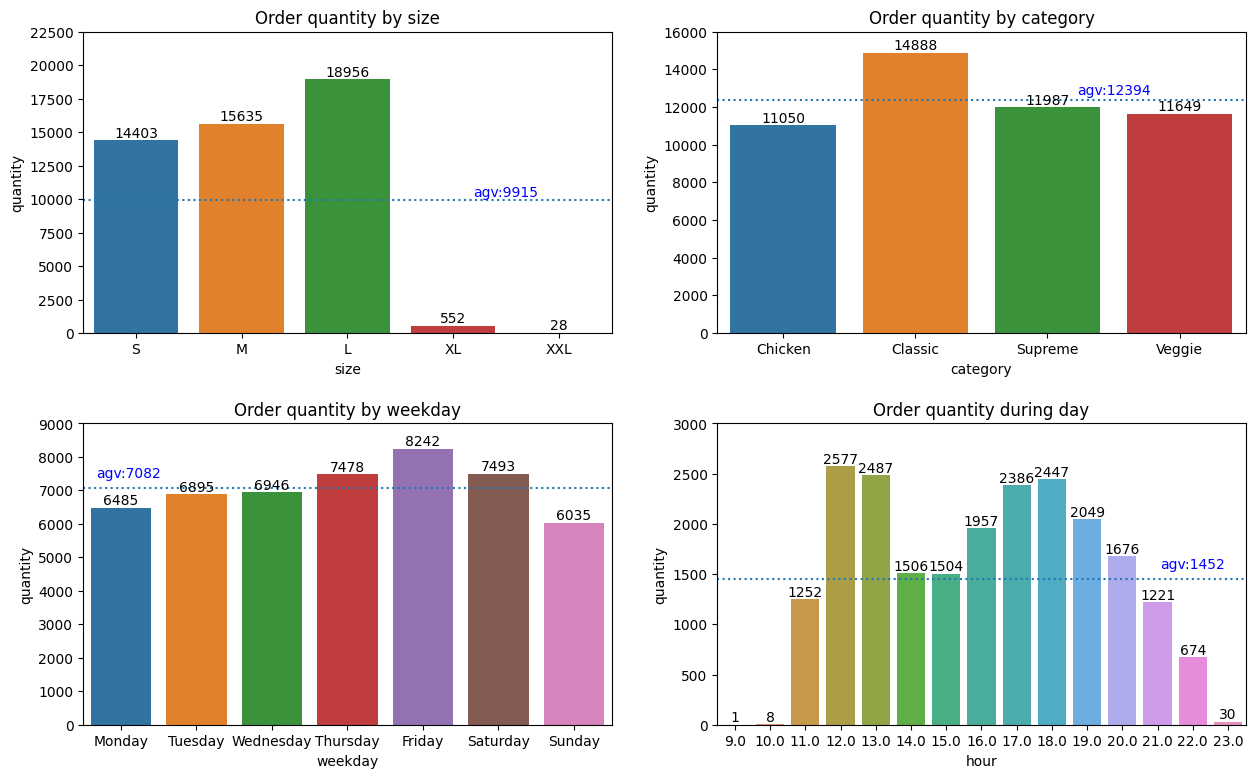

In [104]:
# Charts by quantity
plt.figure(figsize= (15,8))

#============= CHART 1==================
#total quantity by size
plt.subplot(2,2,1)
dfplot = df.groupby('size')['quantity'].sum().reset_index()
ax1 = sns.barplot(data= dfplot, x = 'size', y= 'quantity', order= ['S','M','L','XL','XXL'])
#add bar label
for cont in ax1.containers:
    plt.bar_label(cont)
plt.ylim(0,22500)
plt.title('Order quantity by size')
#add mean quantity
mean_qty = dfplot.quantity.mean()
plt.axhline(y=mean_qty, ls= ':')
plt.text(x= 3.5, y= mean_qty + 300, s= f'agv:{int(round(mean_qty,0))}', ha= 'center', color= 'blue')

#============= CHART 2==================
#total quantity by category
plt.subplot(2, 2, 2)
dfplot = df.groupby('category')['quantity'].sum().reset_index()
ax2 = sns.barplot(data= dfplot, x= 'category', y= 'quantity')
#add bar label
for cont in ax2.containers:
    plt.bar_label(cont)
plt.ylim(0,16000)
plt.title('Order quantity by category')
#add mean quantity
mean_qty = dfplot.quantity.mean()
plt.axhline(y=mean_qty, ls= ':')
plt.text(x= 2.5, y= mean_qty + 300, s= f'agv:{int(round(mean_qty,0))}', ha= 'center', color= 'blue')

#============= CHART 3==================
#total quantity by weekday
plt.subplot(2, 2, 3)
dfplot = df.groupby('weekday')['quantity'].sum().reset_index()
ax2 = sns.barplot(data= dfplot, x= 'weekday', y= 'quantity', order= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#add bar label
for cont in ax2.containers:
    plt.bar_label(cont)
plt.ylim(0,9000)
plt.title('Order quantity by weekday')
#add mean quantity
mean_qty = dfplot.quantity.mean()
plt.axhline(y=mean_qty, ls= ':')
plt.text(x= 0.1, y= mean_qty + 300, s= f'agv:{int(round(mean_qty,0))}', ha= 'center', color= 'blue')

#============= CHART 4==================
#total quantity by hour
plt.subplot(2, 2, 4)
dfplot = df.groupby('hour')['quantity'].sum().reset_index()
ax2 = sns.barplot(data= dfplot, x= 'hour', y= 'quantity')
#add bar label
for cont in ax2.containers:
    plt.bar_label(cont)
plt.ylim(0,3000)
plt.title('Order quantity during day')
#add mean quantity
mean_qty = dfplot.quantity.mean()
plt.axhline(y=mean_qty, ls= ':')
plt.text(x= 13, y= mean_qty + 100, s= f'agv:{int(round(mean_qty,0))}', ha= 'center', color= 'blue')

plt.subplots_adjust(wspace= 0.2, hspace= 0.3)
plt.show()

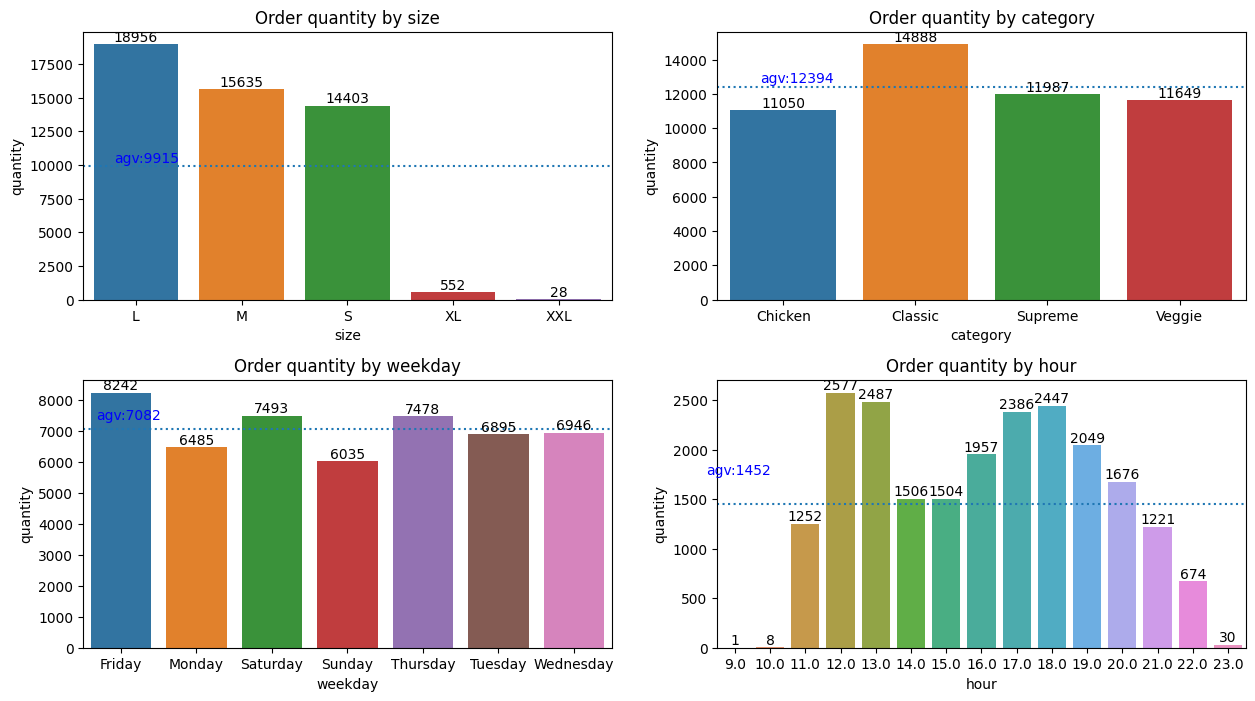

In [121]:
# Visualization in short way.
cat_cols = ['size','category','weekday','hour']
plt.figure(figsize=(15,8))

for i, name in enumerate(cat_cols):
    plt.subplot(2,2,i+1)
    dfplot = df.groupby(name)['quantity'].sum().reset_index()
    ax = sns.barplot(data= dfplot, x= name, y= 'quantity')
    for cont in ax.containers:
        plt.bar_label(cont)
    plt.title(f'Order quantity by {name}')
    mean_qty = dfplot.quantity.mean()
    plt.axhline(y=mean_qty, ls= ':')
    plt.text(x= 0.1, y= mean_qty + 300, s= f'agv:{int(round(mean_qty,0))}', ha= 'center', color= 'blue')

plt.subplots_adjust(wspace= 0.2, hspace= 0.3)
plt.show()

`Most popular size`
- The most popular size were S, M, L. Especially size L.
- Size XL and XXL were really not good at selling.

`Most popular category`
- The Classic was the best selling category. Others were quite similar, nearly the average quantity.
- Please check the Best and Worst Selling Pizza by category as below

`Busiest day and busiest time in a day`
- Peak days in a week were Thursday to Friday, especially the busiest day was Friday.
- The lowest days were Sunday. The store should follow this to prepare amount of ingredients and have some promotions on Sunday to attract the traffic.
- The store opened from 9am to 23pm, but the traffic was very low nearly the opened and closed time.
- Peak hours were 12pm to 13pm and 16pm to 20pm. This suggested that customers were likely to place orders during lunch and dinner time. We may need more staffs on these time for better service.

In [102]:
df_name = df.groupby(['category','name'])[['quantity','revenue','price']].agg({'quantity':'sum','revenue':'sum','price':'mean'}).reset_index()
df_name['qty/day'] = df_name['quantity']/df.date.nunique()
print('Best Selling Pizza by category:')
df_max = df_name.groupby('category')['quantity'].max().reset_index()
df_max = pd.merge(df_name,df_max)
df_max

Best Selling Pizza by category:


,category,name,quantity,revenue,price,qty/day
0,Chicken,The Barbecue Chicken Pizza,2432,42768.00,17.57,6.79
1,Classic,The Classic Deluxe Pizza,2453,38180.50,15.58,6.85
2,Supreme,The Sicilian Pizza,1938,30940.50,15.96,5.41
3,Veggie,The Four Cheese Pizza,1902,32265.70,16.95,5.31


In [103]:
print('Worst Selling Pizza by category:')
df_min = df_name.groupby('category')['quantity'].min().reset_index()
df_min = pd.merge(df_name,df_min)
df_min

Worst Selling Pizza by category:


,category,name,quantity,revenue,price,qty/day
0,Chicken,The Chicken Pesto Pizza,973,16701.75,17.15,2.72
1,Classic,"The Pepperoni, Mushroom, and Peppers Pizza",1359,18834.50,13.87,3.80
2,Supreme,The Brie Carre Pizza,490,11588.50,23.65,1.37
3,Veggie,The Mediterranean Pizza,934,15360.50,16.43,2.61


`Selling price by size in each category`

In [124]:
pd.pivot_table(data= df, index= 'category', columns= 'size', values= ['price'], aggfunc={'price':'mean'})

price                        
size         L     M     S    XL   XXL
category                              
Chicken  20.75 16.75 12.75   NaN   NaN
Classic  18.38 14.74 11.38 25.50 35.95
Supreme  20.65 16.43 14.05   NaN   NaN
Veggie   19.30 15.94 12.16   NaN   NaN

`Selling quantity by size in each category`

In [110]:
fig = px.sunburst(df, path=['category','size'], values='quantity')
fig.show()

In [131]:
# Selling quantity, customer per day
qty_per_day = df.groupby('date')['quantity'].sum().mean()
cus_per_day = df.groupby('date')['order_id'].nunique().mean()
rev_per_day = df.groupby('date')['revenue'].sum().mean()
qty_per_month = df.groupby(df['date'].dt.month)['quantity'].sum().mean()
cus_per_month = df.groupby(df['date'].dt.month)['order_id'].nunique().mean()
rev_per_month = df.groupby(df['date'].dt.month)['revenue'].sum().mean()
print('-'*10,'day','-'*10)
print('Avg order per day:',round(cus_per_day,2))
print('Avg quantity per day:',round(qty_per_day,2))
print('Avg revenue per day:',round(rev_per_day,2))
print('-'*10,'month','-'*10)
print('Avg quantity per month:',round(qty_per_month,2))
print('Avg revenue per month:',round(rev_per_month,2))

---------- day ----------
Avg order per day: 59.64
Avg quantity per day: 138.47
Avg revenue per day: 2284.53
---------- month ----------
Avg quantity per month: 4131.17
Avg revenue per month: 68155.0


# Conclusion

- The most popular size were S, M, L. Especially size L.
- The Classic was the best selling category. Others were quite similar, nearly the average quantity.
- Peak days in a week were Thursday to Friday, especially the busiest day was Friday.
- Peak hours were 12pm to 13pm and 16pm to 20pm. This suggested that customers were likely to place orders during lunch and dinner time.
- The expect quantity and revenue per day was 138.47 and 2284.53.

# Recommendation

- The peak periods during midday and evening rush hours indicate a higher demand for pizzas. It might be useful to have a streamlined process and sufficient staff during these times to handle the increased order volume efficiently.
- The store should follow the selling quantity to prepare the ingredients.
- The low order count during early morning and late-night hours suggests a lower demand during those times. It may be worth considering adjusting staffing levels or operating hours to optimize resource utilization.